In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib notebook

In [35]:
tickers = ['^NSEI']

start = dt.datetime(2020, 1, 1)

data = pdr.get_data_yahoo(tickers, start)

data

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,,
2020-01-01,12182.500000,12182.500000,12222.200195,12165.299805,12202.150391,304100.0
2020-01-02,12282.200195,12282.200195,12289.900391,12195.250000,12198.549805,407700.0
2020-01-03,12226.650391,12226.650391,12265.599609,12191.349609,12261.099609,428800.0
2020-01-06,11993.049805,11993.049805,12179.099609,11974.200195,12170.599609,396500.0
2020-01-07,12052.950195,12052.950195,12152.150391,12005.349609,12079.099609,447800.0
...,...,...,...,...,...,...
2022-11-21,18159.949219,18159.949219,18262.300781,18133.349609,18246.400391,213800.0
2022-11-22,18244.199219,18244.199219,18261.849609,18137.699219,18179.150391,177700.0


In [5]:
data['Volume'].tail(15)

Symbols,^NSEI
Date,
2022-11-04,267900.0
2022-11-07,314800.0
2022-11-09,307200.0
2022-11-10,256500.0
2022-11-11,378500.0
2022-11-14,301400.0
2022-11-15,250900.0
2022-11-16,219300.0
2022-11-17,200500.0


In [36]:
data['net_change'] = data['Open'] - data['Close']
data['net_change_sign'] = [ 1 if i >= 0 else 0 for i in data.net_change ]
data

Attributes,Adj Close,Close,High,Low,Open,Volume,net_change,net_change_sign
Symbols,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,
Date,,,,,,,,
2020-01-01,12182.500000,12182.500000,12222.200195,12165.299805,12202.150391,304100.0,19.650391,1
2020-01-02,12282.200195,12282.200195,12289.900391,12195.250000,12198.549805,407700.0,-83.650391,0
2020-01-03,12226.650391,12226.650391,12265.599609,12191.349609,12261.099609,428800.0,34.449219,1
2020-01-06,11993.049805,11993.049805,12179.099609,11974.200195,12170.599609,396500.0,177.549805,1
2020-01-07,12052.950195,12052.950195,12152.150391,12005.349609,12079.099609,447800.0,26.149414,1
...,...,...,...,...,...,...,...,...
2022-11-21,18159.949219,18159.949219,18262.300781,18133.349609,18246.400391,213800.0,86.451172,1
2022-11-22,18244.199219,18244.199219,18261.849609,18137.699219,18179.150391,177700.0,-65.048828,0


In [37]:
data['prev_close'] = data['Close'].shift()

In [20]:
data.head()

Attributes,Adj Close,Close,High,Low,Open,Volume,net_change,net_change_sign,prev_close
Symbols,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,
Date,,,,,,,,,
2020-01-01,12182.500000,12182.500000,12222.200195,12165.299805,12202.150391,304100.0,19.650391,1,NaN
2020-01-02,12282.200195,12282.200195,12289.900391,12195.250000,12198.549805,407700.0,-83.650391,0,12182.500000
2020-01-03,12226.650391,12226.650391,12265.599609,12191.349609,12261.099609,428800.0,34.449219,1,12282.200195
2020-01-06,11993.049805,11993.049805,12179.099609,11974.200195,12170.599609,396500.0,177.549805,1,12226.650391
2020-01-07,12052.950195,12052.950195,12152.150391,12005.349609,12079.099609,447800.0,26.149414,1,11993.049805


In [38]:
data['Gap'] = data['Open'] - data['Close'].shift()

In [28]:
data[['Close', 'prev_close', 'Open', 'Gap', 'net_change_sign']].head(10)

Attributes,Close,prev_close,Open,Gap,net_change_sign
Symbols,^NSEI,,^NSEI,,
Date,,,,,
2020-01-01,12182.500000,NaN,12202.150391,NaN,1
2020-01-02,12282.200195,12182.500000,12198.549805,16.049805,0
2020-01-03,12226.650391,12282.200195,12261.099609,-21.100586,1
2020-01-06,11993.049805,12226.650391,12170.599609,-56.050781,1
2020-01-07,12052.950195,11993.049805,12079.099609,86.049805,1
2020-01-08,12025.349609,12052.950195,11939.099609,-113.850586,0
2020-01-09,12215.900391,12025.349609,12153.150391,127.800781,0
2020-01-10,12256.799805,12215.900391,12271.000000,55.099609,1


<IPython.core.display.Javascript object>


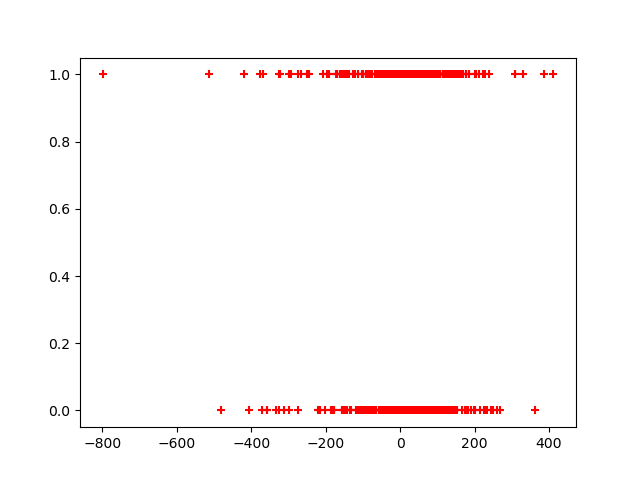

In [27]:
plt.scatter(data.Gap, data.net_change_sign, marker='+',color='red')

In [39]:
data['prev_candle_bar'] = data['Close'].shift() - data['Open'].shift() 

In [44]:
data[['Close', 'Open', 'prev_candle_bar',  'net_change_sign']].head(10)

Attributes,Close,Open,prev_candle_bar,net_change_sign
Symbols,^NSEI,^NSEI,,
Date,,,,
2020-01-01,12182.500000,12202.150391,NaN,1
2020-01-02,12282.200195,12198.549805,-19.650391,0
2020-01-03,12226.650391,12261.099609,83.650391,1
2020-01-06,11993.049805,12170.599609,-34.449219,1
2020-01-07,12052.950195,12079.099609,-177.549805,1
2020-01-08,12025.349609,11939.099609,-26.149414,0
2020-01-09,12215.900391,12153.150391,86.250000,0
2020-01-10,12256.799805,12271.000000,62.750000,1


<IPython.core.display.Javascript object>


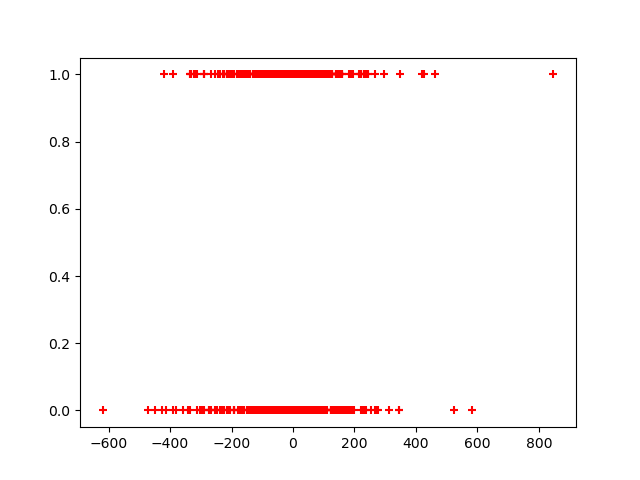

In [42]:
plt.scatter(data.prev_candle_bar, data.net_change_sign, marker='+',color='red')

In [76]:
 data = data.dropna() 

In [77]:
X_train, X_test, y_train, y_test = train_test_split(data[['Gap', 'prev_candle_bar']],data.net_change_sign,train_size=0.875)

In [51]:
X_test.head()

Attributes,Gap,prev_candle_bar
Symbols,,
Date,,
2020-10-07,16.849609,58.950195
2020-01-14,3.549805,32.849609
2021-05-03,-150.049805,-116.250000
2021-08-06,9.800781,5.649414
2022-08-18,-45.599609,76.099609


In [78]:
model = LogisticRegression()

In [79]:
model.fit(X_train, y_train)


LogisticRegression()

In [57]:
np.any(np.isnan(data))

True

In [58]:
 data.dropna() 

Attributes,Adj Close,Close,High,Low,Open,Volume,net_change,net_change_sign,prev_close,Gap,prev_candle_bar
Symbols,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,,,
Date,,,,,,,,,,,
2020-01-02,12282.200195,12282.200195,12289.900391,12195.250000,12198.549805,407700.0,-83.650391,0,12182.500000,16.049805,-19.650391
2020-01-03,12226.650391,12226.650391,12265.599609,12191.349609,12261.099609,428800.0,34.449219,1,12282.200195,-21.100586,83.650391
2020-01-06,11993.049805,11993.049805,12179.099609,11974.200195,12170.599609,396500.0,177.549805,1,12226.650391,-56.050781,-34.449219
2020-01-07,12052.950195,12052.950195,12152.150391,12005.349609,12079.099609,447800.0,26.149414,1,11993.049805,86.049805,-177.549805
2020-01-08,12025.349609,12025.349609,12044.950195,11929.599609,11939.099609,446000.0,-86.250000,0,12052.950195,-113.850586,-26.149414
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-21,18159.949219,18159.949219,18262.300781,18133.349609,18246.400391,213800.0,86.451172,1,18307.650391,-61.250000,-75.298828
2022-11-22,18244.199219,18244.199219,18261.849609,18137.699219,18179.150391,177700.0,-65.048828,0,18159.949219,19.201172,-86.451172


In [59]:
np.any(np.isnan(data))

True

In [61]:
np.all(np.isfinite(data))

False

In [62]:
data.isnull().sum()

Attributes       Symbols
Adj Close        ^NSEI      0
Close            ^NSEI      0
High             ^NSEI      0
Low              ^NSEI      0
Open             ^NSEI      0
Volume           ^NSEI      0
net_change                  0
net_change_sign             0
prev_close                  1
Gap                         1
prev_candle_bar             1
dtype: int64

In [68]:
X_test

Attributes,Gap,prev_candle_bar
Symbols,,
Date,,
2022-03-24,-150.701172,-159.400391
2021-09-02,19.150391,-109.349609
2021-12-27,-66.000000,-145.750000
2022-02-04,30.000000,-207.550781
2020-05-06,21.200195,-223.800781
...,...,...
2021-01-21,86.250000,106.400391
2022-09-05,7.000000,-58.951172


In [70]:
X_test.isnull().sum()

Attributes       Symbols
Gap                         1
prev_candle_bar             1
dtype: int64

In [71]:
X_test.dropna()

Attributes,Gap,prev_candle_bar
Symbols,,
Date,,
2022-03-24,-150.701172,-159.400391
2021-09-02,19.150391,-109.349609
2021-12-27,-66.000000,-145.750000
2022-02-04,30.000000,-207.550781
2020-05-06,21.200195,-223.800781
...,...,...
2021-01-21,86.250000,106.400391
2022-09-05,7.000000,-58.951172


In [72]:
X_test.isnull().sum()

Attributes       Symbols
Gap                         1
prev_candle_bar             1
dtype: int64

In [80]:
y_predicted = model.predict(X_test)

In [75]:
np.any(np.isnan(X_test))

True

In [81]:
model.predict_proba(X_test)

array([[0.51148151, 0.48851849],
       [0.50653641, 0.49346359],
       [0.43451186, 0.56548814],
       [0.51035896, 0.48964104],
       [0.48030413, 0.51969587],
       [0.52123341, 0.47876659],
       [0.50232758, 0.49767242],
       [0.46528115, 0.53471885],
       [0.54525613, 0.45474387],
       [0.51888476, 0.48111524],
       [0.51272932, 0.48727068],
       [0.49914194, 0.50085806],
       [0.49587656, 0.50412344],
       [0.49315443, 0.50684557],
       [0.48753517, 0.51246483],
       [0.51126748, 0.48873252],
       [0.55291517, 0.44708483],
       [0.50146595, 0.49853405],
       [0.50596663, 0.49403337],
       [0.49928404, 0.50071596],
       [0.50099288, 0.49900712],
       [0.46965055, 0.53034945],
       [0.47740756, 0.52259244],
       [0.48908741, 0.51091259],
       [0.47877907, 0.52122093],
       [0.50128329, 0.49871671],
       [0.49929528, 0.50070472],
       [0.4990847 , 0.5009153 ],
       [0.50665656, 0.49334344],
       [0.49855626, 0.50144374],
       [0.

In [82]:
y_predicted

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0], dtype=int64)

In [83]:
model.coef_

array([[-1.02332216e-05,  6.29869679e-04]])

In [84]:
model.intercept_

array([-1.72544398e-06])

In [85]:
df = pd.DataFrame()

In [86]:
df['Actual'] = y_test

In [87]:
df['Predicted'] = y_predicted

In [88]:
df

,Actual,Predicted
Date,,
2022-02-07,1,0
2020-08-26,0,0
2022-02-16,1,1
2020-08-03,1,0
2022-10-06,1,1
...,...,...
2021-10-13,0,1
2020-10-16,0,0
2022-04-04,0,1


In [89]:
df['dif'] = abs(df['Actual'] - df['Predicted'])
np.sum(df['dif'])

48

In [92]:
df[['Probability', 'Anti']] = model.predict_proba(X_test)

In [93]:
df.head()

,Actual,Predicted,dif,Probability,Anti
Date,,,,,
2022-02-07,1,0,1,0.511482,0.488518
2020-08-26,0,0,0,0.506536,0.493464
2022-02-16,1,1,0,0.434512,0.565488
2020-08-03,1,0,1,0.510359,0.489641
2022-10-06,1,1,0,0.480304,0.519696


In [98]:
df[( df.Probability >= 0.55) | (df.Probability <= 0.45 )]

,Actual,Predicted,dif,Probability,Anti
Date,,,,,
2022-02-16,1,1,0,0.434512,0.565488
2020-05-19,1,0,1,0.552915,0.447085
2022-09-01,0,1,1,0.445296,0.554704
2020-03-13,0,0,0,0.569149,0.430851
2020-10-16,0,0,0,0.553937,0.446063


In [99]:
df.head()

,Actual,Predicted,dif,Probability,Anti
Date,,,,,
2022-02-07,1,0,1,0.511482,0.488518
2020-08-26,0,0,0,0.506536,0.493464
2022-02-16,1,1,0,0.434512,0.565488
2020-08-03,1,0,1,0.510359,0.489641
2022-10-06,1,1,0,0.480304,0.519696


In [102]:
df2 = df.shift(1)

In [103]:
df2

,Actual,Predicted,dif,Probability,Anti
Date,,,,,
2022-02-07,NaN,NaN,NaN,NaN,NaN
2020-08-26,1.0,0.0,1.0,0.511482,0.488518
2022-02-16,0.0,0.0,0.0,0.506536,0.493464
2020-08-03,1.0,1.0,0.0,0.434512,0.565488
2022-10-06,1.0,0.0,1.0,0.510359,0.489641
...,...,...,...,...,...
2021-10-13,0.0,1.0,1.0,0.494425,0.505575
2020-10-16,0.0,1.0,1.0,0.488283,0.511717
2022-04-04,0.0,0.0,0.0,0.553937,0.446063
